# Exploratory Data Analysis

### Imports

In [2]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

BASE_SIMULATION_DIR = 'data/simulations/'
BASE_MEASURE_DIR = 'data/measures/'
C = 'consensus_time'
F = 'opinion_change_frequency'

## Reading CSV files

### Measures

In [55]:
measures_file_list = []
for network in os.listdir(BASE_MEASURE_DIR):
    df = pd.read_csv(BASE_MEASURE_DIR + network, index_col=0)
    df.insert(0, 'type', network.split('.')[0])
    measures_file_list.append(df)
    
measures_df = pd.concat(measures_file_list)

FEATURES = list(measures_df.columns)

In [56]:
measures_df = measures_df.rename_axis(['network'])
measures_df

,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality
network,,,,,,,,,
barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008
barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956
barabasi_linear_41.edgelist,barabasi_linear,0.031068,0.335096,1000.464,2.999928,0.077702,-0.027484,0.003420,0.004914
barabasi_linear_73.edgelist,barabasi_linear,0.028693,0.335415,998.483,2.995966,0.090226,-0.035959,0.003408,0.004883
barabasi_linear_52.edgelist,barabasi_linear,0.030809,0.332543,1011.472,3.021944,0.095066,-0.023867,0.003437,0.005010
...,...,...,...,...,...,...,...,...,...
watts-strogatz_71.edgelist,watts-strogatz,0.647961,0.114572,3916.996,8.832992,0.406220,-0.009041,0.001537,0.020998
watts-strogatz_53.edgelist,watts-strogatz,0.642519,0.117571,3790.674,8.580348,0.383648,-0.008082,0.001609,0.021597
watts-strogatz_67.edgelist,watts-strogatz,0.640451,0.122419,3627.605,8.254210,0.347707,-0.002856,0.001657,0.021003


### Simulations

In [57]:
simulations_file_list = []
for network in os.listdir(BASE_SIMULATION_DIR):
    simulations_file_list.append(pd.read_csv(BASE_SIMULATION_DIR + network, index_col=0, header=[0,1]))

simulations_df = pd.concat(simulations_file_list)

In [58]:
simulations_df = simulations_df.stack(level=0, future_stack=True).rename_axis(['network','initialization']).reset_index(1)
simulations_df

,initialization,consensus_time,opinion_change_frequency
network,,,
barabasi_linear_60.edgelist,random,415.80,260.92
barabasi_linear_91.edgelist,random,434.54,254.73
barabasi_linear_41.edgelist,random,410.80,232.71
barabasi_linear_73.edgelist,random,394.59,228.50
barabasi_linear_52.edgelist,random,404.90,243.94
...,...,...,...
watts-strogatz_71.edgelist,random,971.51,400.73
watts-strogatz_53.edgelist,random,947.35,387.56
watts-strogatz_67.edgelist,random,954.75,394.93


### Merging and creating the dataset

In [59]:
dataset = measures_df.merge(simulations_df, on='network', how='right')

In [60]:
dataset

,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,initialization,consensus_time,opinion_change_frequency
network,,,,,,,,,,,,
barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,random,415.80,260.92
barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,random,434.54,254.73
barabasi_linear_41.edgelist,barabasi_linear,0.031068,0.335096,1000.464,2.999928,0.077702,-0.027484,0.003420,0.004914,random,410.80,232.71
barabasi_linear_73.edgelist,barabasi_linear,0.028693,0.335415,998.483,2.995966,0.090226,-0.035959,0.003408,0.004883,random,394.59,228.50
barabasi_linear_52.edgelist,barabasi_linear,0.030809,0.332543,1011.472,3.021944,0.095066,-0.023867,0.003437,0.005010,random,404.90,243.94
...,...,...,...,...,...,...,...,...,...,...,...,...
watts-strogatz_71.edgelist,watts-strogatz,0.647961,0.114572,3916.996,8.832992,0.406220,-0.009041,0.001537,0.020998,random,971.51,400.73
watts-strogatz_53.edgelist,watts-strogatz,0.642519,0.117571,3790.674,8.580348,0.383648,-0.008082,0.001609,0.021597,random,947.35,387.56
watts-strogatz_67.edgelist,watts-strogatz,0.640451,0.122419,3627.605,8.254210,0.347707,-0.002856,0.001657,0.021003,random,954.75,394.93


### Creating Scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

## Networks Boxplots for each Measure

### Clustering

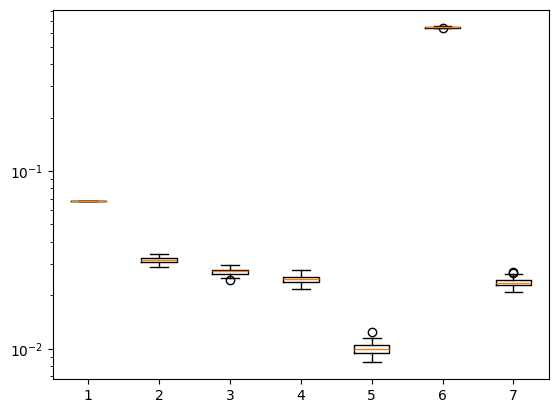

In [122]:
df = dataset.reset_index()[['clustering', 'type']]
df['index'] = df.index % 100
df = df.pivot(index='index', columns='type')

plt.boxplot(df)
plt.yscale('log')

### Consensus Time

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'LFR'),
  Text(2, 0, 'barabasi_linear'),
  Text(3, 0, 'barabasi_nonlinear_05'),
  Text(4, 0, 'barabasi_nonlinear_15'),
  Text(5, 0, 'erdos_renyi'),
  Text(6, 0, 'watts-strogatz'),
  Text(7, 0, 'waxman')])

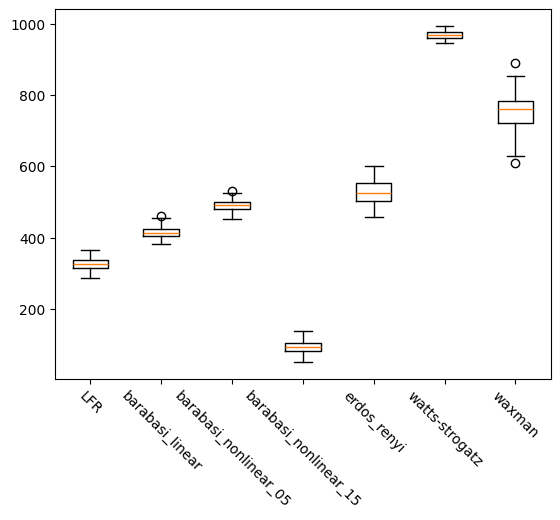

In [132]:
df = dataset.reset_index()[['consensus_time', 'type']]
df['index'] = df.index % 100
df = df.pivot(index='index', columns='type')

plt.boxplot(df, tick_labels=df.columns.levels[1])
plt.xticks(rotation=-45)

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'LFR'),
  Text(2, 0, 'barabasi_linear'),
  Text(3, 0, 'barabasi_nonlinear_05'),
  Text(4, 0, 'barabasi_nonlinear_15'),
  Text(5, 0, 'erdos_renyi'),
  Text(6, 0, 'watts-strogatz'),
  Text(7, 0, 'waxman')])

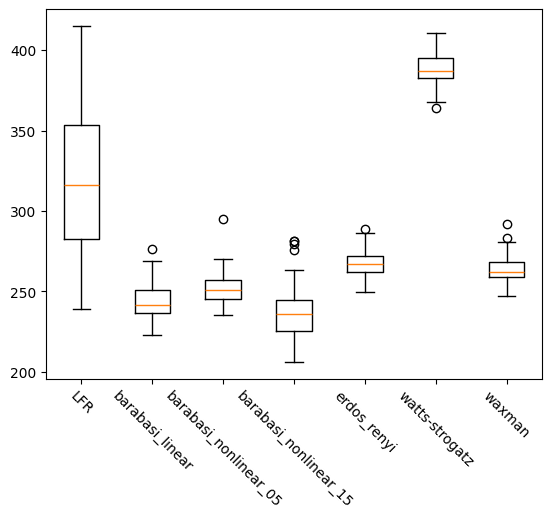

In [133]:
df = dataset.reset_index()[['opinion_change_frequency', 'type']]
df['index'] = df.index % 100
df = df.pivot(index='index', columns='type')

plt.boxplot(df, tick_labels=df.columns.levels[1])
plt.xticks(rotation=-45)